In [1]:
# ** CHEQUEAR QUÉ LIBRERIAS ESTOY Y NO ESTOY USANDO** 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
#dust_file='Dust records corregidos 15-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme

#temp_file='Temps records corregidos 15-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme
#temp_file='Temps records uniformes 130k.xlsx' #Base de datos sin valores repetidos, No uniforme

In [3]:
id_columns=['Name','Data id','Latitud','Longitud','Age units','Data units','Data length']


id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
#id_data=pd.read_excel(temp_file,sheet_name=0,usecols=id_columns)
#id_data.head()

df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)
#df_data=pd.read_excel(temp_file,sheet_name=1,skiprows=1)
df_data.head()

,Year,DustFlux,Year.1,nssCa2 flux,Year.2,Ca2+,Year.3,DustConc,Year.4,Ca2+.1
0,0.375,0.259,1.202,1528.388706,3.791000,0.100000,5.000000,305.363666,7.800600,12.8
1,0.376,NaN,1.203,2032.857113,3.792000,1.050000,5.001000,NaN,7.801601,NaN
2,0.377,NaN,1.204,4912.886973,3.793000,0.616667,5.002000,NaN,7.802602,NaN
3,0.378,NaN,1.205,8533.933273,3.794001,0.050000,5.003001,NaN,7.803603,NaN
4,0.379,NaN,1.206,4206.537792,3.795001,0.866667,5.004001,NaN,7.804603,NaN


In [4]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data.size/len(df_data) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis=[] #Lista de dupla de dataframes: Age & Values
new_length=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]][:id_data['Data length'][int(i/2)]]
        dupla.index=[j for j in range(0, len(dupla))] 
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

In [9]:
lis[0][lis[0].columns[1]]

0      0.259
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
371      NaN
372      NaN
373      NaN
374      NaN
375    0.351
Name: DustFlux, Length: 376, dtype: float64

In [5]:
## ACA ELIJO CON CUAL PROXY VOY A TRABAJAR
dataset=1
n=dataset-1 #de python -> n+1 id dataset

original_age_dust=lis[n][lis[n].columns[0]]
original_values_dust=lis[n][lis[n].columns[1]]

#########################################
d_nan=original_values_dust.isna()
nan_in_row=[]
for i in d_nan:
    if i==False:
        nan_in_row.append(0)
    else:
        nan_in_row.append(1)
#########################################


#contador de nan's in row
aux=[]
contador_de_nans=0
for i in range(len(d_nan)):
    if d_nan[i]==True:
        contador_de_nans+=1
    if d_nan[i]==False and contador_de_nans!=0:
        #aux.append(0)
        aux.append(contador_de_nans)
        contador_de_nans=0
#########################################

new_dataset=[original_values_dust[n]] #n en vez de 0
indice_aux=0
indice_borrador=0

for i in range(1,len(nan_in_row)):
    if nan_in_row[i]==0:
        new_dataset.append(original_values_dust[i])
    if nan_in_row[i]==1:
        #print(i-1,'    ',i+aux[indice_aux])
        #print(indice_aux)
        try:            
            x = np.array([original_age_dust[i-1],original_age_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            y = np.array([original_values_dust[i-1],original_values_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            new_points=aux[indice_aux]
            f2=interp1d(x, y, kind='linear')
            xnew = np.linspace(x.min(), x.max(), num=int(new_points)+1, endpoint=False)
            points=f2(xnew)
            for p in range(1,len(points)):
                new_dataset.append(points[p])
            for j in range(1,aux[indice_aux]):
                nan_in_row[i+j]=2
            indice_aux+=1
            
        except:
            print('error en intervalo',i,'      [',i-1,' - ',i+aux[-1],']')
            print('len aux: ',len(aux))
            print('indice aux: ',indice_aux,'\n')
            indice_aux+=1    

print(len(original_values_dust))
print(len(new_dataset))      

376
376


In [6]:
original_age_dust

0      0.375000
1      0.376000
2      0.377000
3      0.378000
4      0.379000
         ...   
371    0.746039
372    0.747039
373    0.748039
374    0.749039
375    0.750039
Name: Year, Length: 376, dtype: float64

In [30]:
#guardar los datos
dust12_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
dust12_interpolado.to_excel('dust12_interpolado.xlsx')

In [17]:
#temp7_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
#temp7_interpolado.to_excel('temp7_interpolado.xlsx')

### Cuando tira error pruebo con este

In [11]:
#dust_file='DustError6.xls'  #Base de datos sin valores repetidos, Uniforme
#dust_file='TempError4.xls'  #Base de datos sin valores repetidos, Uniforme
#dust_file='Talos dome uniform.xlsx'
dust_file='13-valores_a_interpolar-800.xlsx'


df_data=pd.read_excel(dust_file,sheet_name=0,skiprows=0)

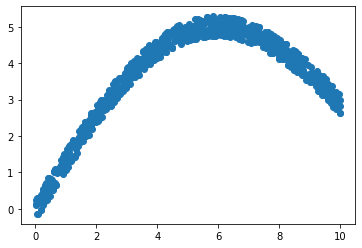

In [12]:
plt.plot(df_data[df_data.columns[0]],df_data[df_data.columns[1]],'o')
plt.show()

In [13]:
df_data[df_data.columns[1]]

0            NaN
1       0.245492
2       0.101165
3            NaN
4            NaN
          ...   
1994         NaN
1995    2.630681
1996    2.640559
1997    2.831559
1998         NaN
Name: Unnamed: 1, Length: 1999, dtype: float64

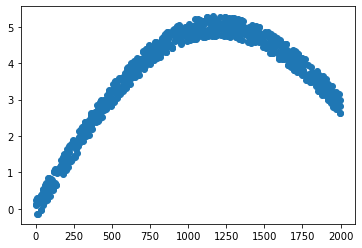

In [14]:
plt.plot(df_data[df_data.columns[1]],'o')

In [15]:
original_age_dust=df_data[df_data.columns[0]]
original_values_dust=df_data[df_data.columns[1]]


In [16]:
original_values_dust

0            NaN
1       0.245492
2       0.101165
3            NaN
4            NaN
          ...   
1994         NaN
1995    2.630681
1996    2.640559
1997    2.831559
1998         NaN
Name: Unnamed: 1, Length: 1999, dtype: float64

In [17]:


#########################################
d_nan=original_values_dust.isna()
nan_in_row=[]
for i in d_nan:
    if i==False:
        nan_in_row.append(0)
    else:
        nan_in_row.append(1)
#########################################


#contador de nan's in row
aux=[]
contador_de_nans=0
for i in range(len(d_nan)):
    if d_nan[i]==True:
        contador_de_nans+=1
    if d_nan[i]==False and contador_de_nans!=0:
        #aux.append(0)
        aux.append(contador_de_nans)
        contador_de_nans=0
#########################################

new_dataset=[original_values_dust[3]] #n en vez de 0 #### BUUUUUG (en vez de 3, era n)
#new_dataset=[original_values_dust] #n en vez de 0
indice_aux=0
indice_borrador=0

for i in range(1,len(nan_in_row)):
    if nan_in_row[i]==0:
        new_dataset.append(original_values_dust[i])
    if nan_in_row[i]==1:
        #print(i-1,'    ',i+aux[indice_aux])
        #print(indice_aux)
        try:            
            x = np.array([original_age_dust[i-1],original_age_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            y = np.array([original_values_dust[i-1],original_values_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            new_points=aux[indice_aux]
            f2=interp1d(x, y, kind='linear')
            xnew = np.linspace(x.min(), x.max(), num=int(new_points)+1, endpoint=False)
            points=f2(xnew)
            for p in range(1,len(points)):
                new_dataset.append(points[p])
            for j in range(1,aux[indice_aux]):
                nan_in_row[i+j]=2
            indice_aux+=1
            
        except:
            print('error en intervalo',i+3,'      [',i+3-1,' - ',i+aux[-1],']   de excel')
            print('len aux: ',len(aux))
            print('indice aux: ',indice_aux,'\n')
            indice_aux+=1    

print(len(original_values_dust))
print(len(new_dataset))   

error en intervalo 2001       [ 2000  -  1999 ]   de excel
len aux:  490
indice aux:  490 

1999
1998


5975

In [18]:
dust5_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
#dust5_interpolado.to_excel('dust6_interpolado.xlsx')
#dust5_interpolado.to_excel('Talos complete interpolated.xlsx')
dust5_interpolado.to_excel('13-valores_interpolados-800.xlsx')
